Total episodes:  1799


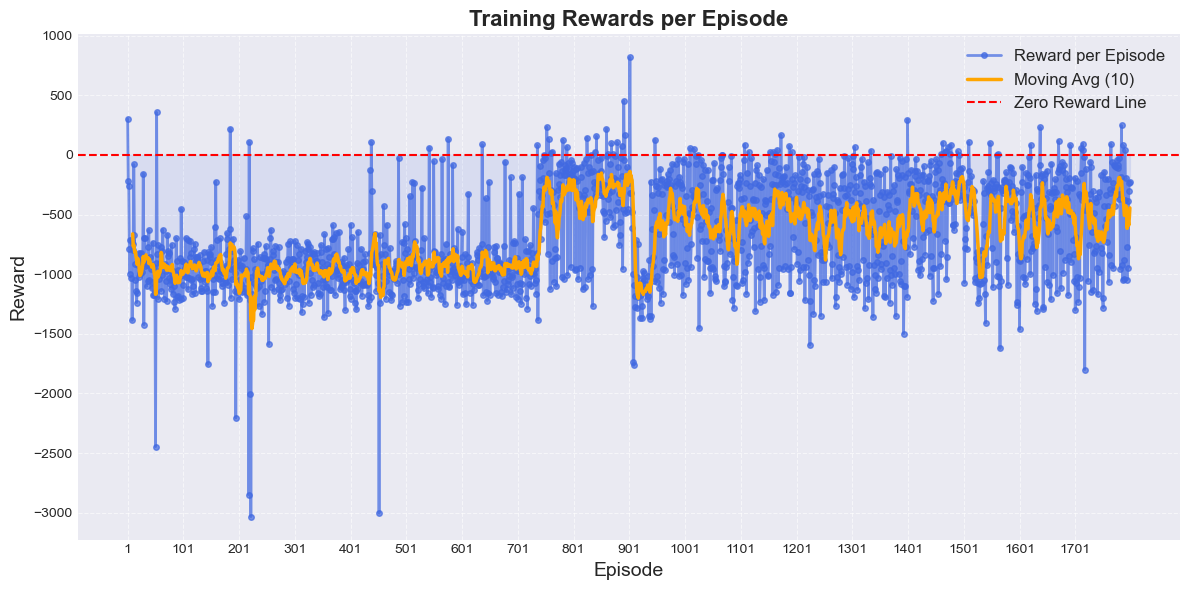

In [128]:
from matplotlib import pyplot as plt
import numpy as np

logs_path = "/Users/danielemateria/Desktop/q-learning-maze-robot/logs"
import os
if not os.path.exists(logs_path):
    print(f"Directory {logs_path} does not exist. Please check the path.")

# List of log file paths to analyze
log_file_paths = os.listdir(logs_path)
log_file_paths = [os.path.join(logs_path, file) for file in log_file_paths if file.endswith('.log')]

def extract_rewards_from_log(log_file_paths):
    rewards = np.array([])
    for log_file_path in log_file_paths:
        with open(log_file_path, 'r') as file:
            reward = None
            for line in file:
                if "|" in line:
                    line = line.split("|")
                    reward = line[1].strip()
                    parts = reward.split(":")
                    reward = float(parts[-1])
                    rewards = np.append(rewards, reward)
    return rewards

def plot_rewards(rewards, window=10):
    plt.style.use("seaborn-v0_8-darkgrid")
    plt.figure(figsize=(12, 6))
    episodes = np.arange(1, len(rewards) + 1)
    plt.plot(episodes, rewards, label='Reward per Episode', color='royalblue', linewidth=2, marker='o', markersize=4, alpha=0.7)
    # Media mobile
    if len(rewards) >= window:
        moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
        plt.plot(episodes[window-1:], moving_avg, label=f'Moving Avg ({window})', color='orange', linewidth=2.5)
    plt.fill_between(episodes, rewards, 0, color='royalblue', alpha=0.1)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Reward Line')
    plt.xlabel('Episode', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Training Rewards per Episode', fontsize=16, fontweight='bold')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    # fai partire l'asse x da 1
    plt.xticks(np.arange(1, len(rewards) + 1, step=100))
    plt.show()

rewards = extract_rewards_from_log(log_file_paths)

print("Total episodes: ", len(rewards))
plot_rewards(rewards)